In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np

from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
tf.__version__

'2.4.1'

In [3]:
keras.__version__

'2.4.0'

In [4]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 5
tf.random.set_seed(RANDOM_SEED)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Read the training and test input data 
train_df_full = pd.read_csv('/content/drive/My Drive/MSDS-462/Week1/fashion-mnist_train.csv')
test_df_full = pd.read_csv('/content/drive/My Drive/MSDS-462/Week1/fashion-mnist_test.csv')

In [7]:
train_df_full.shape

(60000, 785)

In [8]:
test_df_full.shape

(10000, 785)

In [9]:
train_df_full

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,0,83,155,136,116,148,110,118,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,...,199,165,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,159,6,91,0,0,85,159,0,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,0,1,0,0,87,114,77,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,...,228,229,231,231,218,230,255,0,0,0,0,0,0,0,0,0,0,0,116,140,147,166,176,174,173,173,174,173,177,164,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
test_df_full

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,37,93,72,58,55,63,66,89,159,120,20,0,0,0,0,1,0,0,0,0,0,0,1,0,0,22,67,125,151,168,...,112,115,117,117,113,146,41,0,3,0,0,0,0,0,0,0,1,0,1,76,54,55,51,53,53,55,53,44,38,37,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,0,0,76,36,110,170,78,136,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,...,94,84,70,44,0,36,152,65,110,0,0,0,0,0,0,0,21,57,89,7,0,0,0,0,0,0,0,0,0,0,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,0,1,3,0,14,152,184,158,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,...,219,223,226,239,247,241,224,213,144,0,0,0,0,0,0,1,0,44,232,199,200,190,180,179,185,189,191,185,179,178,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,131,192,79,0,0,0,0,...,13,26,17,8,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


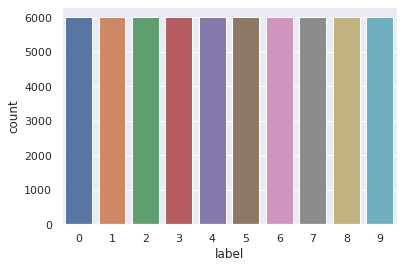

In [11]:
# There are ten classes in the dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="label", data=train_df_full)

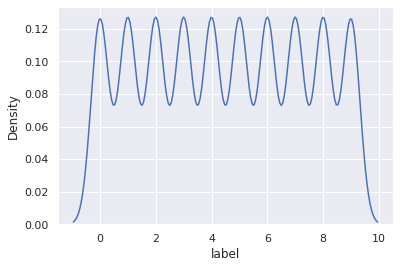

In [12]:
sns.kdeplot(data=train_df_full, x="label")

In [13]:
# Separate the class label from the training set 
X_train_full = train_df_full.iloc[:,1:785]
y_train_full = train_df_full.iloc[:,0]

# Separate the class label from the test set 
X_test_full = test_df_full.iloc[:, 1:785]
y_test_full = test_df_full.iloc[:, 0]

In [14]:
# Split the training set into validation and training set
# Normalize the pixel values by dividing by 255. 
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_full / 255.0
y_test = y_test_full

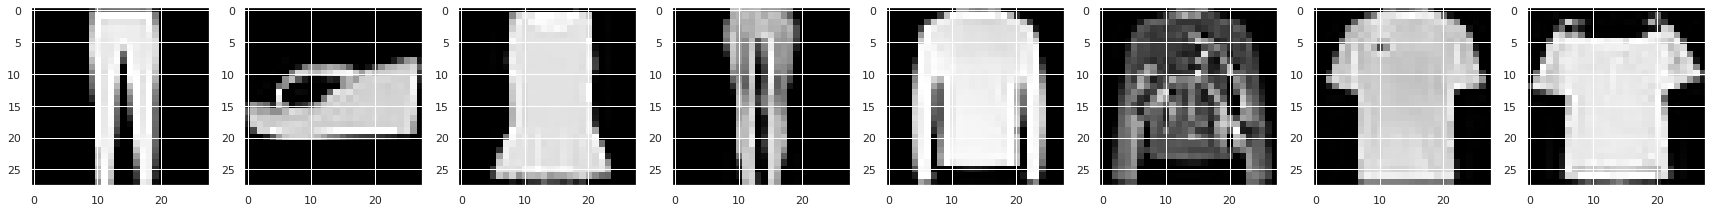

In [15]:
# Plot eight random fashion mnist images in the training data set
plt.figure(figsize=(30,30))
for i in range(1,9):
    j=random.randint(0,X_train.shape[0])
    plt.subplot(1,8,i)
    grid_data = X_train.iloc[j,:].values.reshape(28,28)
    plt.imshow(grid_data, interpolation = 'none', cmap = 'gray')
plt.show()

In [16]:
#Reshape the data for model training
X_train = X_train.values.reshape(X_train.shape[0], 28, 28,1).astype('float32')
X_valid = X_valid.values.reshape(X_valid.shape[0], 28, 28,1).astype('float32')

In [17]:
#Reshape the data for prediction
X_test = X_test.values.reshape(X_test.shape[0], 28, 28,1).astype('float32')

# Classification MLP (Artificial Neural Network)

In [18]:
# classification MLP with two hidden layers, 
# 300 nodes per layer, "relu" hidden layer activation
model_1 = keras.models.Sequential()
model_1.add(keras.layers.Flatten(input_shape=[28, 28]))
model_1.add(keras.layers.Dense(300, activation="relu"))
model_1.add(keras.layers.Dense(300, activation="relu"))
model_1.add(keras.layers.Dense(10, activation="softmax"))

In [19]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Fit the model; 
model_1.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [21]:
history_1 = model_1.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.9973 - accuracy: 0.6886 - val_loss: 0.5193 - val_accuracy: 0.8208
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5071 - accuracy: 0.8247 - val_loss: 0.4506 - val_accuracy: 0.8460
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4492 - accuracy: 0.8444 - val_loss: 0.4273 - val_accuracy: 0.8486
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4231 - accuracy: 0.8523 - val_loss: 0.4334 - val_accuracy: 0.8484
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3984 - accuracy: 0.8615 - val_loss: 0.3965 - val_accuracy: 0.8612
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3824 - accuracy: 0.8666 - val_loss: 0.3910 - val_accuracy: 0.8640
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3694 - accuracy: 0.8684 - val_loss: 0.3705 - val_accuracy:

In [22]:
print ('Train Accuracy: ')
best_model_train_accuracy = np.round(history_1.history['accuracy'][np.argmin(history_1.history['loss'])],4)
best_model_train_accuracy

Train Accuracy: 


0.917

In [23]:
print ('Validation Accuracy: ')
best_model_val_accuracy = np.round(history_1.history['val_accuracy'][np.argmin(history_1.history['val_loss'])],4)
best_model_val_accuracy

Validation Accuracy: 


0.8958

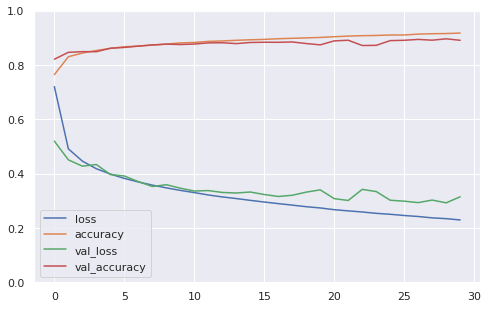

In [24]:
# Plot the learning curve
pd.DataFrame(history_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [25]:
# obtain the predictions for X_test using the Neural Net #1 
model_1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3155 - accuracy: 0.8872


[0.315471887588501, 0.8871999979019165]

In [26]:
y_pred = model_1.predict(X_test)
y_label = np.argmax(y_pred,axis=1)
y_label

array([0, 1, 2, ..., 8, 8, 2])

In [27]:
print(classification_report(y_test, y_label))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.71      0.92      0.80      1000
           3       0.94      0.89      0.91      1000
           4       0.85      0.80      0.82      1000
           5       0.96      0.95      0.96      1000
           6       0.79      0.62      0.69      1000
           7       0.93      0.94      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# Convolutional Neural Network

In [28]:
model_2 = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same",
                        input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [29]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)        

In [30]:
# Fit the model; 
model_2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [31]:
history_2 = model_2.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 42s 7ms/step - loss: 1.7561 - accuracy: 0.3508 - val_loss: 0.6976 - val_accuracy: 0.7464
Epoch 2/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.8573 - accuracy: 0.6825 - val_loss: 0.5514 - val_accuracy: 0.7890
Epoch 3/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.6863 - accuracy: 0.7461 - val_loss: 0.4939 - val_accuracy: 0.8144
Epoch 4/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.6043 - accuracy: 0.7783 - val_loss: 0.4574 - val_accuracy: 0.8266
Epoch 5/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.5578 - accuracy: 0.8004 - val_loss: 0.4139 - val_accuracy: 0.8464
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5209 - accuracy: 0.8175 - val_loss: 0.3871 - val_accuracy: 0.8602
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4892 - accuracy: 0.8282 - val_loss: 0.3585 - val_ac

In [32]:
print ('Train Accuracy: ')
best_model_train_accuracy = np.round(history_2.history['accuracy'][np.argmin(history_2.history['loss'])],4)
best_model_train_accuracy

Train Accuracy: 


0.9141

In [33]:
print ('Validation Accuracy: ')
best_model_val_accuracy = np.round(history_2.history['val_accuracy'][np.argmin(history_2.history['val_loss'])],4)
best_model_val_accuracy

Validation Accuracy: 


0.9156

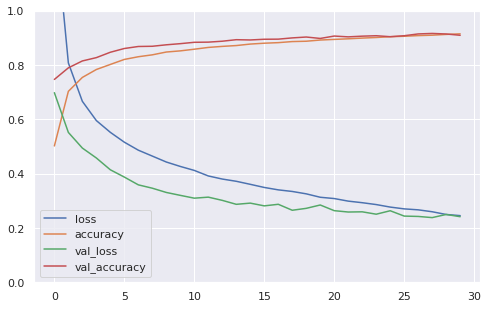

In [34]:
# Plot the learning curve
pd.DataFrame(history_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [35]:
# obtain the predictions for X_test using the Neural Net #2
model_2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2520 - accuracy: 0.9095


[0.2519816756248474, 0.909500002861023]

In [36]:
y_pred = model_2.predict(X_test)
y_label = np.argmax(y_pred,axis=1)
y_label

array([0, 1, 2, ..., 8, 8, 1])

In [37]:
print(classification_report(y_test, y_label))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1000
           1       0.99      0.99      0.99      1000
           2       0.86      0.85      0.86      1000
           3       0.95      0.89      0.92      1000
           4       0.80      0.92      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.74      0.77      0.75      1000
           7       0.96      0.95      0.96      1000
           8       0.97      0.99      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



# LeNet-5 CNN

##### Reference: https://www.datasciencecentral.com/profiles/blogs/lenet-5-a-classic-cnn-architecture#:~:text=The%20LeNet%2D5%20architecture%20consists,and%20finally%20a%20softmax%20classifier.

##### Instead of 32x32 pixel input as proposed for LeNet-5, we use 28x28 pixel input

In [48]:
model_3 = keras.models.Sequential([
keras.layers.Conv2D(6,kernel_size=(5,5),strides=(1,1),activation='tanh',input_shape=[28,28,1],padding="same"),
keras.layers.AveragePooling2D(pool_size=(2,2),strides=(1,1),padding='valid'),
keras.layers.Conv2D(16,kernel_size=(5,5),strides=(1,1),activation='tanh',padding='valid'),
keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),
keras.layers.Conv2D(120,kernel_size=(5,5),strides=(1,1),activation='tanh',padding='valid'),
keras.layers.Flatten(),
keras.layers.Dense(84,activation='tanh'),
keras.layers.Dense(10,activation='softmax')
])

In [49]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 23, 23, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 120)         48120     
_________________________________________________________________
flatten_3 (Flatten)          (None, 5880)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 84)               

In [50]:
# Fit the model; 
model_3.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [51]:
history_3 = model_3.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9375 - accuracy: 0.6724 - val_loss: 0.5018 - val_accuracy: 0.8134
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4841 - accuracy: 0.8247 - val_loss: 0.4376 - val_accuracy: 0.8422
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4186 - accuracy: 0.8498 - val_loss: 0.3987 - val_accuracy: 0.8660
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3885 - accuracy: 0.8612 - val_loss: 0.3843 - val_accuracy: 0.8656
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3589 - accuracy: 0.8724 - val_loss: 0.3631 - val_accuracy: 0.8756
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3454 - accuracy: 0.8769 - val_loss: 0.3498 - val_accuracy: 0.8784
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3256 - accuracy: 0.8837 - val_loss: 0.3388 - val_accuracy:

In [52]:
print ('Train Accuracy: ')
best_model_train_accuracy = np.round(history_3.history['accuracy'][np.argmin(history_3.history['loss'])],4)
best_model_train_accuracy

Train Accuracy: 


0.9425

In [53]:
print ('Validation Accuracy: ')
best_model_val_accuracy = np.round(history_3.history['val_accuracy'][np.argmin(history_3.history['val_loss'])],4)
best_model_val_accuracy

Validation Accuracy: 


0.9016

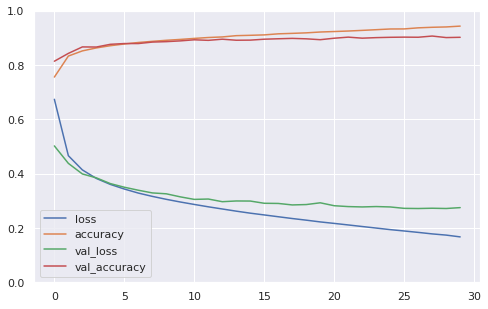

In [54]:
# Plot the learning curve
pd.DataFrame(history_3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [55]:
# obtain the predictions for X_test using the Neural Net #3
model_3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2678 - accuracy: 0.9019


[0.2677704691886902, 0.9018999934196472]

In [56]:
y_pred = model_3.predict(X_test)
y_label = np.argmax(y_pred,axis=1)
y_label

array([0, 1, 2, ..., 8, 8, 4])

In [57]:
print(classification_report(y_test, y_label))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.81      0.87      0.84      1000
           3       0.92      0.90      0.91      1000
           4       0.83      0.88      0.85      1000
           5       0.98      0.97      0.97      1000
           6       0.76      0.69      0.72      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

